In [3]:
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.dates import MonthLocator,MONTHLY
import datetime as dt
import pylab
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Spark Regression Test 

In [4]:
data = yf.download('4938.TW','2018-08-01','2018-11-20') # load data from Yahoo Finance API
data = pd.DataFrame(data)
display(data)
MA1 = 5
MA2 = 10
startdate = dt.date(2018, 8, 1)
enddate = dt.date(2018, 11, 20)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,68.500000,68.500000,67.300003,67.500000,67.500000,10502559
2018-08-02,67.900002,68.000000,66.300003,66.599998,66.599998,6697063
2018-08-03,65.900002,66.900002,65.699997,66.699997,66.699997,8937956
2018-08-06,66.900002,66.900002,65.599998,66.000000,66.000000,9782180
2018-08-07,66.099998,67.000000,66.099998,66.599998,66.599998,7640971
2018-08-08,67.000000,67.099998,66.300003,66.599998,66.599998,7018989
2018-08-09,66.800003,67.000000,66.500000,66.699997,66.699997,4963037
2018-08-10,67.599998,69.000000,67.099998,69.000000,69.000000,19756970
2018-08-13,69.000000,69.000000,67.500000,67.800003,67.800003,7861854


In [5]:
data.index.name = 'DateTime'
data = data[data.index < enddate.strftime('%Y-%m-%d')]
datasreshape = data.reset_index()
datasreshape['DateTime']=mdates.date2num(datasreshape['DateTime'].astype(dt.date))

In [6]:
datasreshape.columns

Index(['DateTime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data['Close'].values[-5:]

array([51.200001, 50.700001, 50.299999, 51.      , 52.5     ])

In [8]:
Av1 = data.rolling(window=MA1).mean()   # set moving averages
Av2 = data.rolling(window=MA2).mean()
SP1 = len(datasreshape.DateTime.values[MA1-1:])
SP2 = len(datasreshape.DateTime.values[MA2-1:])
Label1 = str(MA1)+' SMA'
Label2 = str(MA2)+' SMA'

In [9]:
%matplotlib notebook

In [10]:
traindatasize=60 # train data size
X = pd.DataFrame(datasreshape.DateTime[:traindatasize])
Y=pd.DataFrame(datasreshape.Close[:traindatasize])

In [11]:
lm = linear_model.LinearRegression() # linear regression model
model = lm.fit(X,Y)
model.coef_
predictions = lm.predict(pd.DataFrame(datasreshape.DateTime))

In [12]:
dtreg = DecisionTreeRegressor(max_depth=2) # decision tree regression model
dtreg.fit(X,Y)
dtpredictions=dtreg.predict(pd.DataFrame(datasreshape.DateTime))

In [13]:
rfreg = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100) # random forest regression model
rfreg.fit(X,Y)
rfpredictions=rfreg.predict(pd.DataFrame(datasreshape.DateTime))

<IPython.core.display.Javascript object>


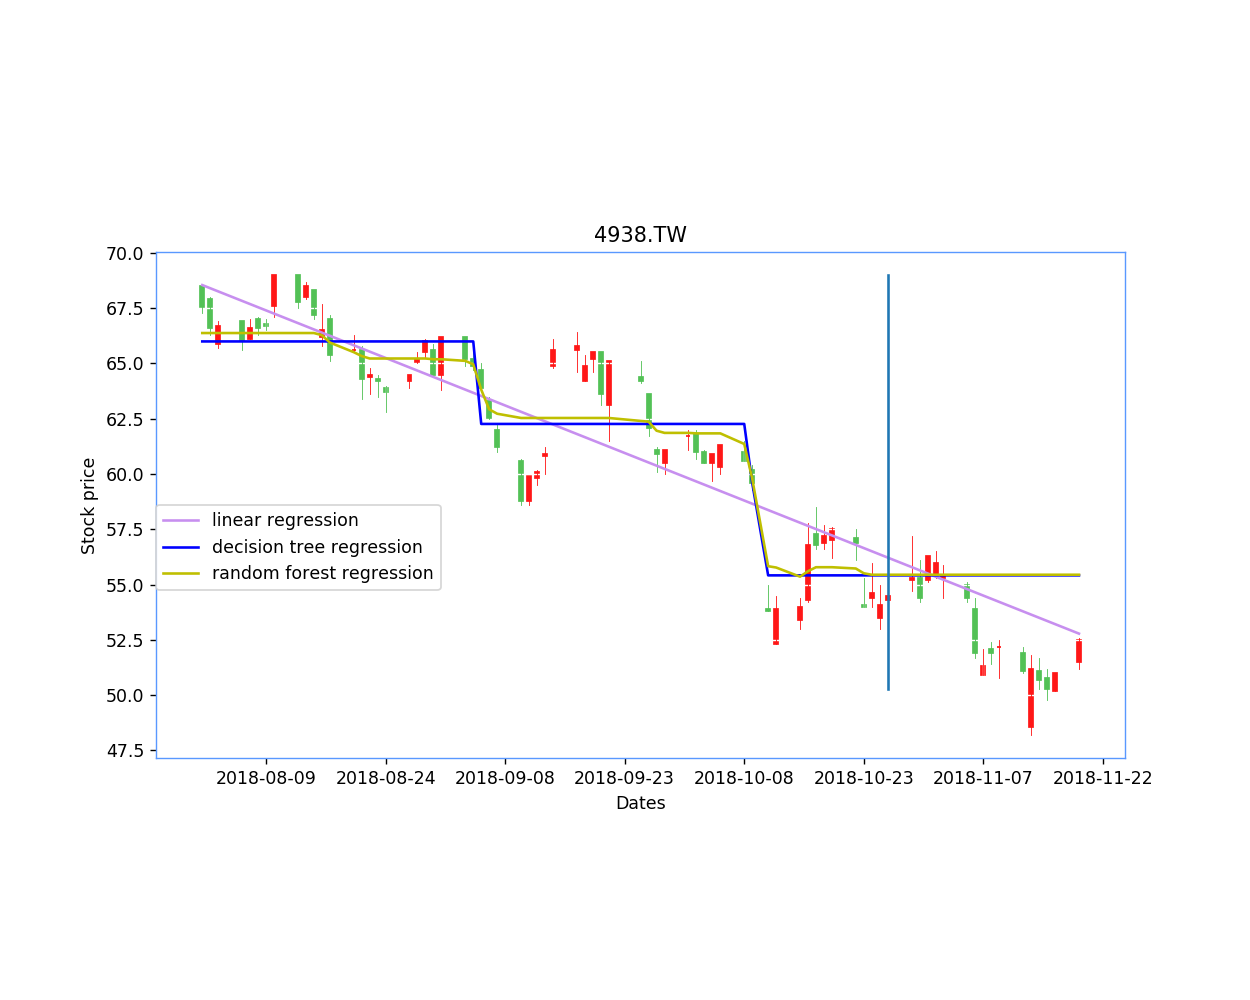

In [14]:
fig = plt.figure(facecolor='w',figsize=(10,8))
ax1 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4, facecolor='#ffffff')
candlestick_ohlc(ax1, datasreshape.values, width=.5, colorup='#ff1717', colordown='#53c156')
#ax1.plot(datasreshape.DateTime.values[-SP1:],Av1.Close.values[-SP1:],'#e1edf9',label=Label1, linewidth=1.5)
#ax1.plot(datasreshape.DateTime.values[-SP2:],Av2.Close.values[-SP2:],'#4ee6fd',label=Label2, linewidth=1.5)
ax1.plot(datasreshape.DateTime.values,predictions,'#c78fef',label='linear regression', linewidth=1.5)
ax1.plot(datasreshape.DateTime.values,dtpredictions,'b',label='decision tree regression', linewidth=1.5)
ax1.plot(datasreshape.DateTime.values,rfpredictions,'y',label='random forest regression', linewidth=1.5)
ax1.plot((datasreshape.DateTime[traindatasize],datasreshape.DateTime[traindatasize]),(min(datasreshape.Close.values),max(datasreshape.Close.values)))
ax1.grid(True, color='w')
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.yaxis.label.set_color("k")
ax1.xaxis.label.set_color("k")
ax1.spines['bottom'].set_color("#5998ff")
ax1.spines['top'].set_color("#5998ff")
ax1.spines['left'].set_color("#5998ff")
ax1.spines['right'].set_color("#5998ff")
ax1.tick_params(axis='y', colors='k')
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
ax1.tick_params(axis='x', colors='k')
plt.ylabel('Stock price')
plt.xlabel('Dates')
plt.title('4938.TW')
plt.legend(bbox_to_anchor=(0,0.5), loc=2, borderaxespad=0.)
plt.savefig('foo.png')
plt.show()

<span style="color:red">stock price movements deviate significantly from the predicted result.</span>